In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

!ln -s /content/gdrive/ /mydrive

Mounted at /content/gdrive


In [2]:
# importing all the required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt
% matplotlib inline
from skimage.io import imread, imsave
from tqdm import tqdm
from os import listdir
from os.path import isfile, join
import imageio
import os

In [12]:
dir_path = '/content/gdrive/MyDrive/Dataset/COVID-CT-Dataset/non-COVID/'
allFiles = [f for f in listdir(dir_path) if isfile(join(dir_path, f))]

In [13]:
# loading images
images = []
for img_name in tqdm(allFiles):
    image_path = dir_path + img_name
    img = imread(image_path)
    img = img/255
    images.append(img)

100%|██████████| 397/397 [00:07<00:00, 49.86it/s] 


In [14]:
allImages = np.array(images)

In [15]:
augmented_dataset = []
for i in tqdm(range(allImages.shape[0])):
    augmented_dataset.append(allImages[i])
    augmented_dataset.append(rotate(allImages[i], angle=45, mode = 'wrap'))
    augmented_dataset.append(np.fliplr(allImages[i]))
    augmented_dataset.append(np.flipud(allImages[i]))
    augmented_dataset.append(random_noise(allImages[i],var=0.2**2))

100%|██████████| 397/397 [00:17<00:00, 22.61it/s]


In [16]:
total_augmented = len(augmented_dataset)
augmented_dataset = np.array(augmented_dataset)

augmented_dataset.shape

(1985,)

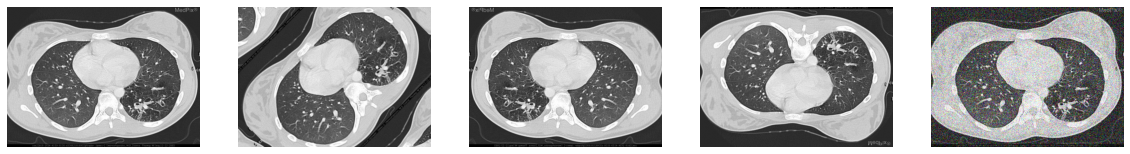

In [17]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(augmented_dataset[i])
    ax[i].axis('off')

In [19]:
DATASET_PATH = 'COVID-CT-Dataset_augmented'
class_name = 'non-COVID'

IMAGES_PATH = f'{DATASET_PATH}/{class_name}'
os.makedirs(DATASET_PATH, exist_ok=True)
os.makedirs(IMAGES_PATH, exist_ok=True)

for i in range(int(total_augmented/5)):
  for j in range(5):
    file_name = f'{IMAGES_PATH}/{class_name}_{i+1}_{j+1}.png'
    imageio.imwrite(file_name, augmented_dataset[j+(i*5)])

In [20]:
len([f for f in listdir(IMAGES_PATH) if isfile(join(IMAGES_PATH, f))])

1985

(217, 285, 3)


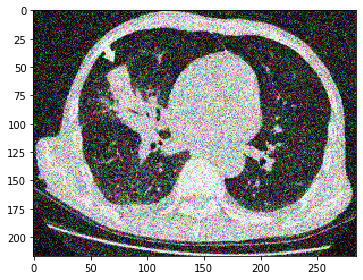

In [21]:
# reading the image using its path
image = io.imread(f'{IMAGES_PATH}/non-COVID_397_5.png')

# shape of the image
print(image.shape)

# displaying the image
io.imshow(image)

In [22]:
!cp -r '/content/COVID-CT-Dataset_augmented' '/content/gdrive/MyDrive/Dataset/COVID-CT-Dataset_augmented'